In [ ]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linspace
from scipy import pi,sqrt,exp
from scipy.special import erf
from pylab import plot,show
import random

In [ ]:
df=pd.DataFrame()

In [ ]:
N = 10000

In [ ]:
'''This script generates random data for the SLA column in a DataFrame.
The SLA values are generated using a skewed normal distribution and a tail of random values.'''

from matplotlib.pylab import xlabel
#SLA
import random
def randn_skew_fast(N, alpha=0.0, loc=0.0, scale=1.0):
    sigma = alpha / np.sqrt(1.0 + alpha**2)
    u0 = np.random.randn(N)
    v = np.random.randn(N)
    u1 = (sigma*u0 + np.sqrt(1.0 - sigma**2)*v) * scale
    u1[u0 < 0] *= -1
    u1 = u1 + loc
    return u1

p_tail = 100
loc= 30
scale= 35
alpha = 4
# lets check again
n_tail = int(N/p_tail)
r = randn_skew_fast(N-n_tail, alpha, loc, scale)
max2 = 4320
tail = random.sample(range(int(max(r)), max2), n_tail)
tail = pd.Series(tail)
SLA = np.concatenate((r,tail))
np.random.shuffle(SLA)
SLA = pd.Series(SLA).apply(int)
df['SLA'] = SLA
df

,SLA
0,30
1,72
2,100
3,88
4,33
...,...
9995,23
9996,106
9997,69
9998,26


Text(0.5, 1.0, 'SLA distribution')

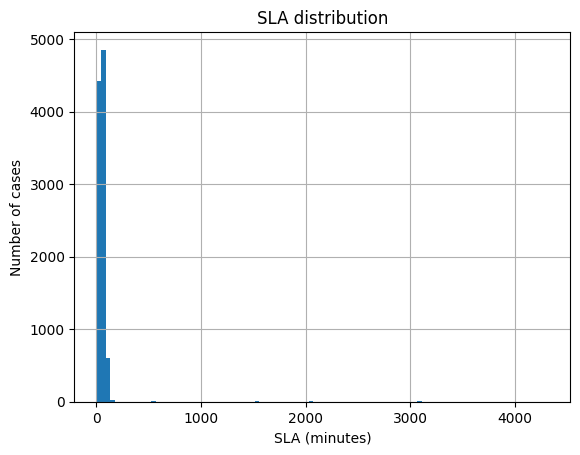

In [ ]:
# Visualizing the SLA distribution
SLA.hist(bins=100)
plt.xlabel('SLA (minutes)')
plt.ylabel('Number of cases')
plt.title('SLA distribution')

In [ ]:
def generate_data(column_name, values, size = N, probabilities=None, seed=None):
    """
    Generate random data for a column using the specified values and probabilities, or assume a uniform distribution over
    all entries in 'values' if 'probabilities' is not given. Plot the counts of each value.

    Parameters:
    column_name (str): The name of the column.
    values (list): A list of the possible values for the column.
    probabilities (list, optional): A list of the probabilities of each value, can be None.

    """
    if seed is not None:
        np.random.seed(seed)

    if probabilities is None:
        probabilities = [1/len(values)] * len(values)
    column = np.random.choice(
        a=values,
        size=size,
        p=probabilities)
    column = pd.DataFrame(column, columns=[column_name])
    return column


In [ ]:
# Call the function for the 'priority' column
values = [5,4,3,2,1]
probabilities = [0.05, 0.25, 0.1, 0.5, 0.1]
priority=generate_data('priority', values, size=N, probabilities=probabilities, seed=444)
priority.value_counts()


priority
2           4961
4           2539
3           1016
1            990
5            494
dtype: int64

In [ ]:
# Creating correllation between SLA and priority

random.seed(42)  # Set the seed value for reproducibility
priority_bins=[10, 40, 70, 100, 300, 4320]
p_noise = 0.01
n_noise = int(N*p_noise)
noise = random.sample([1,2,3,4,5] * n_noise, n_noise)
noise=pd.Series(noise)
priority_series = priority['priority']
labels = priority_series.unique()
priority_SLA = pd.cut(SLA, bins = priority_bins, labels = labels, ordered=False)
new_priority = priority_SLA[0:n_noise].apply(lambda x: noise[x] if x in noise.index else x) # use apply() method to replace values
priority = np.concatenate((new_priority.values.reshape(-1,1), priority[n_noise:]), axis=0).astype(int) # reshape new_priority to have 2 dimensions before concatenating
df['priority'] = priority
df['priority'].value_counts()


2    4911
4    2517
1    1045
3    1036
5     491
Name: priority, dtype: int64

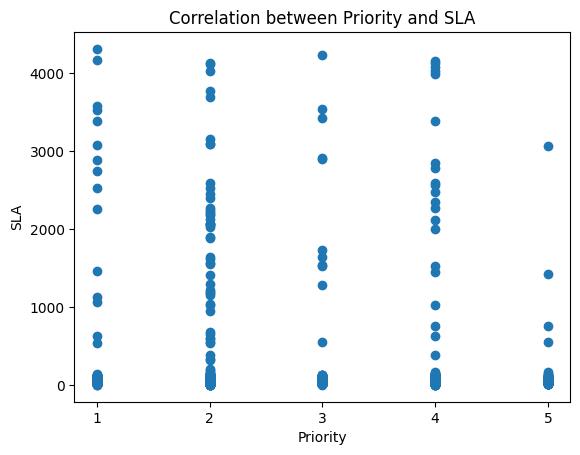

In [ ]:
#Visualizing the correlation between SLA and priority


plt.scatter(df['priority'], df['SLA'])
plt.xlabel('Priority')
# Set the tick locations and labels for the x-axis
plt.xticks(range(1, df['priority'].max()+1))
plt.ylabel('SLA')
plt.title('Correlation between Priority and SLA')
plt.show()


In [ ]:
random.seed(42)
# Group by 'priority' and 'SLA' and calculate the counts
grouped = df.groupby(['priority', 'SLA']).size().reset_index(name='counts')

# Randomly select 20 rows
random_rows = grouped.sample(n=30)

# Sort the randomly selected rows by 'priority' column
sorted_rows = random_rows.sort_values('priority')

# Display the randomly selected and sorted rows
sorted_rows



,priority,SLA,counts
39,1,52,8
98,1,116,4
15,1,28,10
14,1,27,13
124,1,4168,1
40,1,53,15
64,1,77,11
4,1,17,3
136,2,19,17
224,2,107,9


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt

def generate_time_in_system_data(df, N):
    """
    Generate data for the 'time_in_system' column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to generate data for.
    N (int): The number of rows to generate data for.

    Returns:
    pandas.DataFrame: The DataFrame with the 'time_in_system' column added.
    """
    max_tis = 259200  # maximum time in minutes
    sla = df['SLA'].astype(int)  # Convert to integers

    tis1 = sla.apply(lambda sla: random.randint(0, max(1, sla)))  # Ensure non-zero range
    tis2 = sla.apply(lambda sla: random.randint(sla, sla + 120))
    max_tis2 = tis2.max()
    tis3 = pd.Series([random.randint(max_tis2, max_tis) for _ in range(N)], dtype=int)

    p_tis1 = tis1.iloc[:int(0.8 * N)]
    p_tis2 = tis2.iloc[int(0.8 * N) + 1:int(0.9 * N)]
    p_tis3 = tis3.iloc[int(0.9 * N) + 1:N]

    tis = pd.concat([p_tis1, p_tis2, p_tis3])
    tis = tis.sample(frac=1)

    tis.hist(bins=5)
    plt.xlabel('tis (minutes)')
    plt.ylabel('Number of cases')
    plt.title(' Time In System distribution')

    df['time_in_system'] = tis.astype(int)  # Convert to integers
    return df


,SLA,priority,time_in_system
0,30,3,23.0
1,72,1,43.0
2,100,1,70.0
3,88,1,64.0
4,33,3,12.0
...,...,...,...
9995,23,2,32100.0
9996,106,2,232965.0
9997,69,2,173881.0
9998,26,2,99495.0


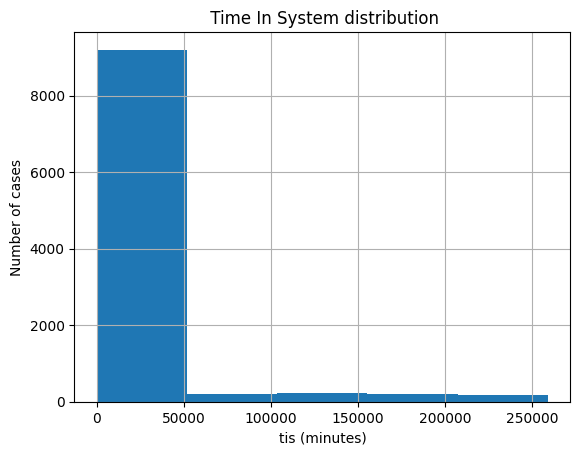

In [ ]:
df=generate_time_in_system_data(df, N)
df

Text(0.5, 1.0, 'Count of each Ordering Department')

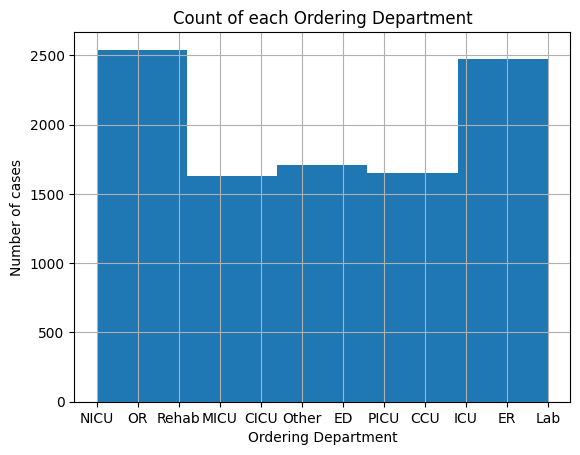

In [ ]:
# Sample dataset of ordering_department

# Call the function 'generate_data' for the 'ordering_department' column
values = ['Other', 'ED', 'ER', 'OR', 'ICU', 'CCU', 'CICU', 'NICU', 'PICU', 'MICU', 'Lab', 'Rehab']
size=N
probabilities = None
df['ordering_department']=generate_data('ordering_department', values, size=N, probabilities=probabilities)
df['ordering_department'].hist(bins=5)
plt.xlabel('Ordering Department')
plt.ylabel('Number of cases')
plt.title('Count of each Ordering Department')

In [ ]:
import seaborn as sns
# Define the values and probabilities for the 'critical findings' column
values = ['No findings', 'Not enough data', 'Intracranial Hemorrhage', 'M1 Large Vessel Occlusions',
          'Vessel Occlusion', 'Aortic Dissection', 'Pneumothorax', 'Brain Aneurysm',
          'Acute C-Spine Fractures', 'Pulmonary Embolism', 'Intra-Abdominal Free Gas',
          'Incidental PE', 'Rib Fractures', 'Malpositioned Endotracheal Tubes']
probabilities = [1/len(values)] * len(values)

# Generate the 'critical findings' column with 95% null values by calling the function 'generate_data'
p_nan = 0.95
n_nan = int(N*p_nan)

critical_findings = (generate_data('critical findings', values, size=N-n_nan, probabilities=probabilities)['critical findings']).tolist()
critical_findings = (['Nan'] * n_nan + critical_findings)

# Plot the result as a histogram
critical_findings=pd.Series(critical_findings)
df['critical_findings'] = critical_findings
df['critical_findings']=np.random.permutation(df['critical_findings'])


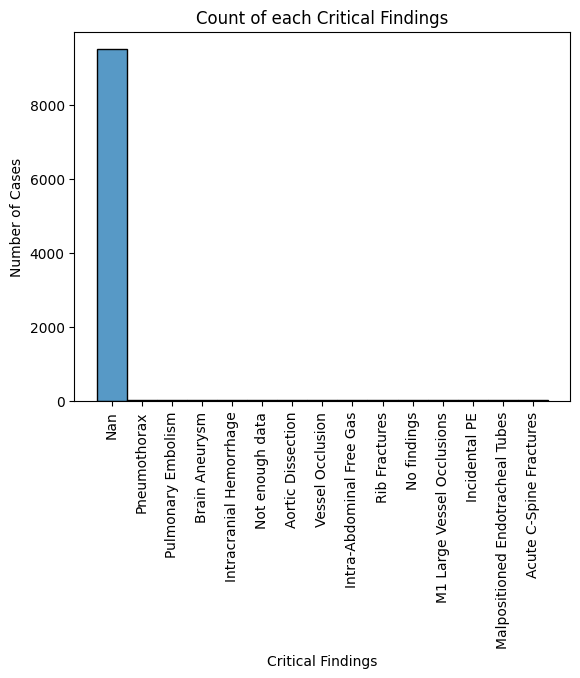

<Figure size 4000x4000 with 0 Axes>

In [ ]:
sns.histplot(critical_findings, discrete=True)
plt.xlabel('Critical Findings')
plt.ylabel('Number of Cases')
plt.title('Count of each Critical Findings')
plt.xticks(rotation=90)
plt.figure(figsize=(40, 40))
plt.show()


In [ ]:
df


,SLA,priority,time_in_system,critical_findings
0,54,1,40.0,Nan
1,82,1,14.0,Nan
2,26,3,0.0,Nan
3,44,1,17.0,Nan
4,71,1,31.0,Nan
...,...,...,...,...
9995,91,2,43601.0,Nan
9996,86,2,84970.0,Nan
9997,94,2,23578.0,Nan
9998,57,2,250991.0,Nan


,SLA,priority,time_in_system,ordering_department,patient_class
0,30,3,23.0,NICU,Inpatient
1,72,1,43.0,OR,Outpatient
2,100,1,70.0,Rehab,Inpatient
3,88,1,64.0,MICU,Obstetrics
4,33,3,12.0,Rehab,Outpatient
...,...,...,...,...,...
9995,23,2,32100.0,PICU,Outpatient
9996,106,2,232965.0,MICU,Pre admit
9997,69,2,173881.0,OR,Recurring patient
9998,26,2,99495.0,CCU,Inpatient


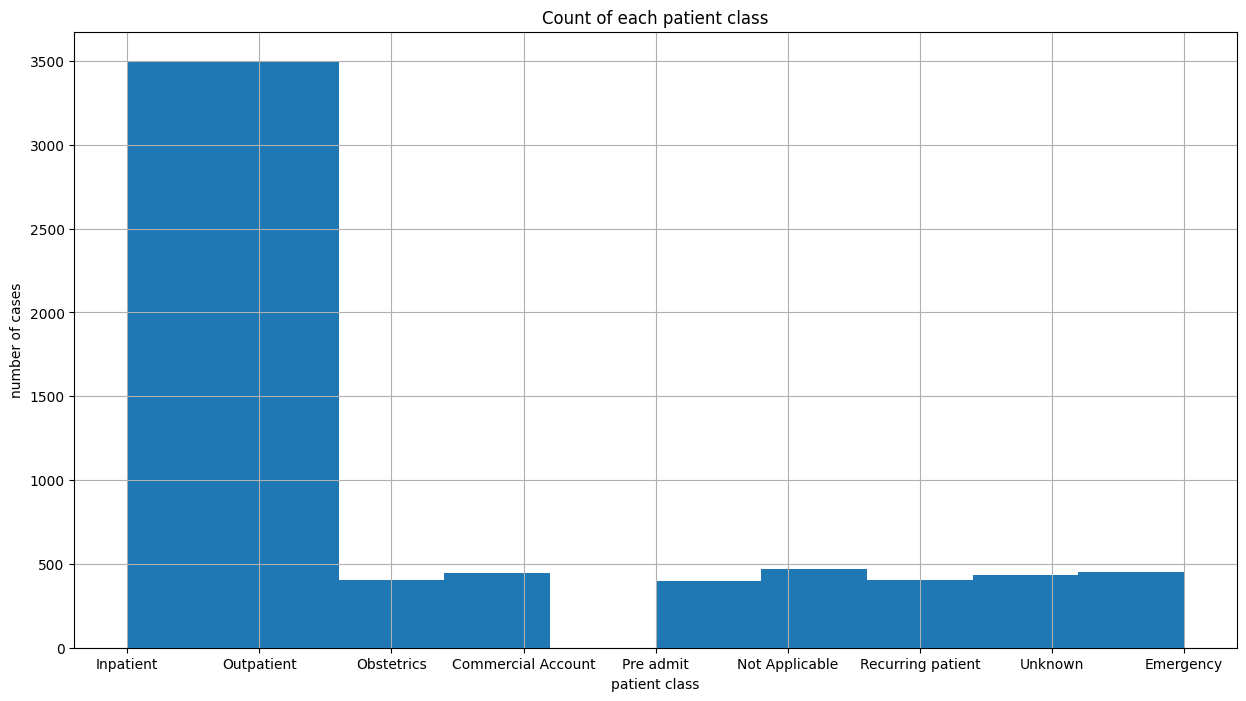

In [ ]:
# Creating patient class column

# Define the probabilities
p_in_out = 0.35
p_other=0.3
n_in_out = int(N*p_in_out)
n_other = int(N*p_other)
np.random.seed(444)

# Generate data for the patient class in the "other" category using the generate_data() function
patient_class_other=generate_data('Patient_Class',
    values=['Obstetrics', 'Commercial Account', 'Emergency', 'Not Applicable', 'Pre admit', 'Recurring patient', 'Unknown'],
    size=n_other,
    probabilities=None)['Patient_Class'].values
# Concatenate the patient class data from the inpatient/outpatient category and the other category and Shuffle it.
patient_class=np.concatenate((np.array(['Inpatient', 'Outpatient']*(n_in_out)), patient_class_other))
np.random.shuffle(patient_class)
# Create a histogram of the patient class data
pd.Series(patient_class).hist(figsize=(15,8))
plt.xlabel('patient class')
plt.ylabel('number of cases')
plt.title('Count of each patient class')
df['patient_class']= patient_class
df

In [ ]:
#Exam description
# exam_desc is a list of possible exam descriptions
exam_desc= [
'CT ABD W CONTRAST 74160',
'CT ABD WO CONTRAST 74150',
'CT ABD WWO CONTRAST 74170',
'CT ABDOMEN PELVIS W 74177',
'CT ABDOMEN PELVIS WO 74176',
'CT ABDOMEN PELVIS WWO 74178',
'CT HEART WO DYE QUAL 75571',
'CT CYSTOGRAM WWO 74178 51600',
'CT GUID BONE MARROW ASP 38220',
'CT GUID BX ABD RETRO 49180',
'CT GUID BX LIVER 47000 77012',
'CT GUID BX LUNG 32408',
'CT GUID BX LYMPH 38505 77012',
'CT GUID BX MUSCLE 20206 77012',
'CT GUID BX PANCREAS48102 77012',
'CT GUID BX PLUERAL 32400 77012',
'CT GUID BX RENAL 50200 77012',
'CT GUID BX SALIVARY 77012',
'CT GUID BX THYROID 60100 77012',
'CT GUID BXBONE ILIAC 20220 770',
'CT GUID BXBONE SUP 20220 77012',
'CT GUID BXBONEDEEP 20225 77012',
'CT GUID CATH PLACEMENT 75989',
'CT GUID DRAIN ABD RETRO 49406',
'CT GUID DRAIN LIVER ABSC 49405',
'CT GUID DRAIN SOFT TISSU 10030',
'CT GUID NEEDLE PLACEMENT',
'CT GUID PARACENTESIS 49083',
'CT GUID THORA W CATH 32557',
'CT GUID THORA WO CATH 32555',
'CT GUIDED ASP 20610 77012',
'CT HEAD CVA TIA 70450',
'CT HEAD NEURO STAT 70450',
'CT HEAD W CONTRAST 70460',
'CT HEAD WO CONTRAST 70450',
'CT HEAD WWO CONTRAST 70470',
'CT LOWER EXT WO BIL 73700',
'CT LOWER EXTR WWO BI 73702',
'CT LOWER EXTREMITY W 73701',
'CT LOWER EXTREMITY W BI 73701',
'CT LOWER EXTREMITY WO 73700',
'CT LOWER EXTREMITY WWO 73702',
'CT LUNG SCREENING THORAX 71271',
'CT MAXILLOFACIAL W 70487',
'CT MAXILLOFACIAL WWO 70488',
'CT ORBITS IAC W 70481',
'CT ORBITS IAC WO 70480',
'CT ORBITS IAC WWO 70482',
'CT PELVIS W 72193',
'CT PELVIS WO 72192',
'CT PELVIS WWO 72194',
'CT RAD TREATMENT PLAN 77014',
'CT SINUS MAX FACIAL WO 70486',
'CT SOFT TISSUE NECK W 70491',
'CT SOFT TISSUE NECK WO 70490',
'CT SOFT TISSUE NECK WWO 70492',
'CT SPINE CERVICAL W 72126',
'CT SPINE CERVICAL WO 72125',
'CT SPINE CERVICAL WWO 72127',
'CT SPINE LUMBAR W 72132',
'CT SPINE LUMBAR WO 72131',
'CT SPINE LUMBAR WWO 72133',
'CT SPINE THORACIC W 72129',
'CT SPINE THORACIC WO 72128',
'CT SPINE THORACIC WWO 72130',
'CT STROKE HEAD WO CON 70450',
'CT TEMPORAL BONE WWO 70482',
'CT TEMPORAL BONES WO 70480',
'CT THORAX W CONTRAST 71260',
'CT THORAX WO CONTRAS 71250',
'CT THORAX WWO CONTRA 71270',
'CT TRAUMA ABD PEL WITH 74177',
'CT TRAUMA C SPINE WO 72125',
'CT TRAUMA FACE SINUS WO 70486',
'CT TRAUMA HEAD WITHOUT 70450',
'CT TRAUMA THORAX W 71260',
'CT UPPER EXTEMITY WWO 73202',
'CT UPPER EXTREMITY W 73201',
'CT UPPER EXTREMITY WO 73200',
'CT UPPER EXTREMITY WO BI 73200',
'CTA ABDOMEN 74175',
'CTA ABDOMEN PEL W RUNOFF 75635',
'CTA ABDOMEN PELVIS 74174',
'CTA HEAD 70496',
'CTA LOWER EXTREMITY 73706',
'CTA NECK CAROTIDS 70498',
'CTA PELVIS 72191',
'CTA THORAX PE 71275',
'CTA UPPER EXT BIL 73206',
'CTA UPPER EXT BIL NO CHARGE',
'CTA UPPER EXTREMITY UNI 73206',
'GS CT ABD W CONTRAST 74160',
'GS CT ABD WO CONTRAST 74150',
'GS CT ABD WWO CONTRAST 74170',
'GS CT ABDOMEN PELVIS W 74177',
'GS CT ABDOMEN PELVIS WO 74176',
'GS CT ABDOMEN PELVIS WWO 74178',
'GS CT CALCIUM SCORE WO 75571',
'GS CT CYSTOGRAM WWO 74178 5160',
'GS CT FACIAL BONES WO 70486',
'GS CT HEAD NEURO STAT 70450',
'GS CT HEAD W CONTRAST 70460',
'GS CT HEAD WO CONTRAST 70450',
'GS CT HEAD WWO CONTRAST 70470',
'GS CT LOW EXTEMITY WO BI 73700',
'GS CT LOW EXTREMITY W BI 73701',
'GS CT LOWER EXT WWO 73702',
'GS CT LOWER EXT WWO BI 73702',
'GS CT LOWER EXTEMITY WO 73700',
'GS CT LOWER EXTREMITY W 73701',
'GS CT LUNG SCREEN CHEST 71271',
'GS CT MAXILLOFACIAL W 70487',
'GS CT MAXILLOFACIAL WO 70486',
'GS CT MAXILLOFACIAL WWO 70488',
'GS CT ORBITS IAC W 70481',
'GS CT ORBITS IAC WO 70480',
'GS CT ORBITS IAC WWO 70482',
'GS CT PELVIS W 72193',
'GS CT PELVIS WO 72192',
'GS CT PELVIS WWO 72194',
'GS CT SINUS MAX FAC WO 70486',
'GS CT SOFT TISS NECK WWO 70492',
'GS CT SOFT TISSU NECK WO 70490',
'GS CT SOFT TISSUE NECK W 70491',
'GS CT SPINE CERVICAL W 72126',
'GS CT SPINE CERVICAL WO 72125',
'GS CT SPINE CERVICAL WWO 72127',
'GS CT SPINE LUMBAR W 72132',
'GS CT SPINE LUMBAR WO 72131',
'GS CT SPINE LUMBAR WWO 72133',
'GS CT SPINE THORACIC W 72129',
'GS CT SPINE THORACIC WO 72128',
'GS CT SPINE THORACIC WWO 72130',
'GS CT TEMPORAL BONE WWO 70482',
'GS CT TEMPORAL BONES WO 70480',
'GS CT THORAX W CONTRAST 71260',
'GS CT THORAX WO CONTRAS 71250',
'GS CT THORAX WWO CONTRA 71270',
'GS CT TRAUMA ABD PEL W 74177',
'GS CT TRAUMA C SPINE WO 72125',
'GS CT TRAUMA FACE SIN WO 70486',
'GS CT TRAUMA HEAD WO 70450',
'GS CT TRAUMA THORAX W 71260',
'GS CT UP EXTEMITY WWO BI 73202',
'GS CT UP EXTREMITY W BI 73201',
'GS CT UP EXTREMITY WO BI 73200',
'GS CT UPPER EXTEMITY WWO 73202',
'GS CT UPPER EXTREMITY W 73201',
'GS CT UPPER EXTREMITY WO 73200',
'GS CTA ABD PEL W RUNOFF 75635',
'GS CTA ABDOMEN 74175',
'GS CTA ABDOMEN PELVIS 74174',
'GS CTA HEAD 70496',
'GS CTA LOW EXTREMITY BI 73706',
'GS CTA LOWER EXTREMITY 73706',
'GS CTA NECK CAROTIDS 70498',
'GS CTA PELVIS 72191',
'GS CTA THORAX PE 71275',
'GS CTA UP EXTEMITY BI 73206',
'GS CTA UP EXTEMITY UNI 73206',
'CB ABD SERIES W PA CXR 74022',
'CB CHEST 4 VIEWS OR MORE 71048',
'CB CXR WITH OBLIQUES 71047',
'CB FACIAL BONES ROUTINE 70150',
'CB MANDIBLE BI 70110',
'CB NASAL BONES 70160',
'CB ORBITS 70200',
'CB PELVIS AP 1 OR 2 VIEW 72170',
'CB RIBS BI ROUTINE 71111',
'CB SHOULDERS BI ROUTINE 73030',
'CB SINUSES 1 OR 2 VIEW 70210',
'CB SINUSES ROUTINE 70220',
'CB SKULL ROUTINE 70250',
'CB SOFT TISSUE NECK 70360',
'CB SPINE CER ROUTINE 72050',
'CB TMJ BI 70330',
'CB ABDOMEN 2 VIEWS 74019',
'CB ABDOMEN KUB 74018',
'CB ANKLE UNI 1 OR 2 V 73600',
'CB ANKLE UNI ROUTINE 73610',
'CB BONE AGE STUDY 77072',
'CB BONE SURVEY FOR METS 77074',
'CB CALCANEUS HEEL UNI 73650',
'CB CLAVICLE UNI 73000',
'CB ELBOW UNIL ROUTINE 73080',
'CB ENTIRE SPINE 2OR3V 72082',
'CB FEMUR UNI 73552',
'CB FINGER OR FINGERS 73140',
'CB FOOT UNI ROUTINE 73630',
'CB FOREARMS UNI 73090',
'CB HAND UNI ROUTINE 73130',
'CB HIP UNI ROUTINE 73502',
'CB HIPS BI ROUTINE 73521',
'CB HUMERUS UNI 73060',
'CB KNEE BI ROUTINE 73564',
'CB KNEE UNI 1 OR 2 VIEWS 73560',
'CB KNEE UNI ROUTINE 73564',
'CB RIBS UNI ROUTINE 71101',
'CB SACROILIAC JOINTS 72202',
'CB SACRUM AND COCCYX 72220',
'CB SCAPULA UNI 73010',
'CB SHOULDERS UNI ROUTINE 73030',
'CB SPINE CER 6 OR MORE 72052',
'CB SPINE LUMBAR 2 OR 3 V 72100',
'CB SPINE LUMBAR FLX EXT 72114',
'CB SPINE LUMBAR ROUTINE 72110',
'CB SPINE THORACIC ROUTIN 72072',
'CB ANY SPINE 1 VIEW 72020',
'CB SPINE CER 2 OR 3 VIEW 72040',
'CB STERNOCLAVICULAR JTS 71130',
'CB STERNUM 71120',
'CB TIBIA FIBULA UNI 73590',
'CB TOE OR TOES 73660',
'CB HIP UNI 1 V W/WO PEL 73501',
'CB WRIST UNI 1 OR 2 VIEW 73100',
'CB WRISTS BI ROUTINE 73110',
'CB WRISTS UNI ROUTINE 73110',
'CENTRAL BALDWIN CXR2 71046',
'CHOOSE XRTIBFI',
'DO NOT USE FOR IP CXR1 71045',
'GS INFANT BONE SURVEY 77076',
'GS XR ABD SER W PA CXR 74022',
'GS XR ABDOMEN 2 VIEWS 74019',
'GS XR ABDOMEN 3 OR MORE 74021',
'GS XR ABDOMEN KUB 74018',
'GS XR AC JOINTS 73050',
'GS XR ANKLE BI 1 OR 2 V 73600',
'GS XR ANKLE BI ROUTINE 73610',
'GS XR ANKLE UNI 1 OR 2 V 73600',
'GS XR ANKLE UNI ROUTINE 73610',
'GS XR BONE AGE STUDY 77072',
'GS XR BONE SURV FOR METS 77074',
'GS XR CALCANEUS HEEL BI 73650',
'GS XR CALCANEUS HEEL UNI 73650',
'GS XR CHEST 1 VIEW 71045',
'GS XR CHEST 2 VIEW 71046',
'GS XR CHEST 3 VIEWS 71047',
'GS XR CHEST 4 V OR MORE 71048',
'GS XR CLAVICLE BI 73000',
'GS XR CLAVICLE UNI 73000',
'GS XR ELBOW BI 1 2 VIEW 73070',
'GS XR ELBOW BI ROUTINE 73080',
'GS XR ELBOW BI ROUTINE 73080',
'GS XR ELBOW UNI 1 2 VIEW 73070',
'GS XR ELBOW UNI ROUTINE 73080',
'GS XR ENTIRE SPIN 2 3 VW 72082',
'GS XR FACIAL BONES ROUT 70150',
'GS XR FEMURS BI 73552',
'GS XR FEMURS UNI 73552',
'GS XR FINGER OR FINGERS 73140',
'GS XR FOOT BI 1 2 VIEW 73620',
'GS XR FOOT BI ROUTINE 73630',
'GS XR FOOT UNI 1 2 VIEW 73620',
'GS XR FOOT UNI ROUTINE 73630',
'GS XR FOREARMS BI 73090',
'GS XR FOREARMS UNI 73090',
'GS XR HAND BI ROUTINE 73130',
'GS XR HAND UNI ROUTINE 73130',
'GS XR HIP UNI ROUTINE 73502',
'GS XR HIPS BI ROUTINE 73521',
'GS XR HUMERUS BI 73060',
'GS XR HUMERUS UNI 73060',
'GS XR INFANT FB 76010',
'GS XR INFANT LOW EXT BI 73592',
'GS XR INFANT LOW EXT UNI 73592',
'GS XR INFANT UP EXT UNI 73092',
'GS XR KNEE BI 1 2 VIEWS 73560',
'GS XR KNEE BI ROUTINE 73564',
'GS XR KNEE UNI 1 2 VIEWS 73560',
'GS XR KNEE UNI ROUTINE 73564',
'GS XR KNEES BI STANDING 73565',
'GS XR MANDIBLE BI 70110',
'GS XR NASAL BONES 70160',
'GS XR NECK SOFT TISSUE 70360',
'GS XR ORBITS 70200',
'GS XR PELVIS AP 1 OR 2 V 72170',
'GS XR RIBS BI ROUT WCXR 71111',
'GS XR RIBS UNI ROUT WCXR 71101',
'GS XR SACROILIAC JOINTS 72202',
'GS XR SACRUM AND COCCYX 72220',
'GS XR SCAPULA BI 73010',
'GS XR SCAPULA UNI 73010',
'GS XR SHOULDER BI ROUT 73030',
'GS XR SHOULDER UNI ROUT 73030',
'GS XR SINUS 1 OR 2 VIEW 70210',
'GS XR SINUSES ROUTINE 70220',
'GS XR SKULL 3 OR LESS V 70250',
'GS XR SP ANY LEVEL 72020',
'GS XR SP CER 2 OR 3 VIEW 72040',
'GS XR SP CER 6 OR MORE 72052',
'GS XR SP CER ROUTINE 72050',
'GS XR SP LUMBAR 2 OR 3 V 72100',
'GS XR SP LUMBAR FLX EXT 72114',
'GS XR SP LUMBAR ROUT 72110',
'GS XR SP THORACIC ROUT 72072',
'GS XR SP THORACOLUMBAR 72080',
'GS XR SPINE SCOLIOSIS 72081',
'GS XR SPINE THORACI 2 VW 72070',
'GS XR STERNOCLAVICUL JTS 71130',
'GS XR STERNUM 71120',
'GS XR TIBIA FIBULA BI 73590',
'GS XR TIBIA FIBULA UNI 73590',
'GS XR TMJ BI 70330',
'GS XR TOE OR TOES 73660',
'GS XR TOE OR TOES BI 73660',
'GS XR UNI HIP 1 VIEW 73501',
'GS XR WRIST UNI 1 OR 2 V 73100',
'GS XR WRISTS BI 1 OR 2 V 73100',
'GS XR WRISTS BI ROUTINE 73110',
'GS XR WRISTS UNI ROUTINE 73110',
'OC XR ABD 2VW NO CXR',
'OC XR ABD SERIES CXR1',
'OC XR ABD 1 VIEW',
'OC XR AC JOINTS',
'OC XR ANKLE 3V+ BI',
'OC XR ANKLE 3V+ UNI',
'OC XR BONE AGE STUDY',
'OC XR HEEL BI',
'OC XR HEEL UNI',
'OC XR CXR 1V',
'OC XR CHEST 2 VIEW 71046',
'OC XR CXR 3V+',
'OC XR CLAVICLE BIL',
'OC XR CLAVICLE UNIL',
'OC XR ELBOW 3V+ BI',
'OC XR FACIAL BONES 3V+',
'OC XR FEMUR BI',
'OC XR ELBOW 3V+ UNI',
'OC XR FEMUR UNI',
'OC XR FINGER OR MULTI',
'OC XR FOOT BI',
'OC XR FOOT 3V UNI',
'OC XR FOREARM BI',
'OC XR FOREARM UNI',
'OC XR HAND BI',
'OC XR HAND UNI',
'OC XR HIP 2 OR 3V UNI',
'OC XR HIP 2V BI W PEL',
'OC XR HUMERUS BI',
'OC XR HUMERUS UNI',
'OC XR KNEE 4V BI',
'OC XR KNEE 4V UNI',
'OC XR MANDIBLE BI',
'OC XR MASTOID',
'OC XR METS BONE SURV 77074',
'OC XR NASAL BONES',
'OC XR NECK SOFT TISUE',
'OC XR ORBITS',
'OC XR PELVIS AP 1 VIEW',
'OC XR BIL RIBS W/EXP PA CHEST',
'OC XR RIBS UNI W/EXP PA CHEST',
'OC XR SACROILIAS JOINTS',
'OC XR SACRUM/COCCYX',
'OC XR SCAPULA BI',
'OC XR SCAPULA UNI',
'OC XR SHOULDER BI',
'OC XR SHOULDER UNI',
'OC XR SINUS',
'OC XR SKULL',
'OC XR SPINE CERVICAL 2 VIEWS',
'OC XR SPINE SPINE CERV 6',
'OC XR SPINE CERV 4 OR 5 VWS',
'OC XR SPINE SPINE LUMB TRAUMA',
'OC XR SPINE LUMBAR W BENDING',
'OC XR SPINE LUMBAR COMP',
'OC XR SPINE THORACIC 3V',
'OC XR ENTIRE SPINE 2OR3V 72082',
'OC XR SC JOINTS',
'OC XR STERNUM',
'OC XR TIB FIB BI',
'OC XR TIB FIB UNI',
'OC XR TOE OR MULTI 73660',
'OC XR WRIST 3V+ UNI',
'OC XR WRIST 3V+ BI',
'OR MINI CARM PROCEDURE NO CHAR',
'UC XR ABDOMEN 2 VIEWS 74019',
'UC XR ABDOMEN 3 OR MORE 74021',
'UC XR ABDOMEN KUB 74018',
'UC XR ABDOMEN SER W CXR 74022',
'UC XR ANKLE BI ROUTINE 73610',
'UC XR ANKLE UNI 1 OR 2 V 73600',
'UC XR ANKLE UNI ROUTINE 73610',
'UC XR BONE AGE STUDY 77072',
'UC XR BONE SURV FOR METS 77074',
'UC XR CALCANEUS HEEL BI 73650',
'UC XR CALCANEUS HEEL UNI 73650',
'UC XR CHEST 1 VIEW 71045',
'UC XR CHEST 2 VIEW 71046',
'UC XR CHEST 3 VIEWS 71047',
'UC XR CHEST 4 V OR MORE 71048',
'UC XR CLAVICLE BI 73000',
'UC XR CLAVICLE UNI 73000',
'UC XR ELBOW BI 1 2 VIEW 73070',
'UC XR ELBOW BI ROUTINE 73080',
'UC XR ELBOW UNI 1 2 VIEW 73070',
'UC XR ELBOW UNI ROUTINE 73080',
'UC XR EMPLOYEE CXR 1 V 71045',
'UC XR ENTIRE SPIN 2 3 VW 72082',
'UC XR FACIAL BONE ROUTIN 70150',
'UC XR FACIAL BONES ROUT 70150',
'UC XR FEMURS BI 73552',
'UC XR FEMURS UNI 73552',
'UC XR FINGER OR FINGERS 73140',
'UC XR FOOT BI ROUTINE 73630',
'UC XR FOOT UNI ROUTINE 73630',
'UC XR FOREARMS BI 73090',
'UC XR FOREARMS UNI 73090',
'UC XR HAND BI ROUTINE 73130',
'UC XR HAND BILAT 2V 73120',
'UC XR HAND UNI ROUTINE 73130',
'UC XR HIP UNI ROUTINE 73502',
'UC XR HIPS BI ROUTINE 73521',
'UC XR HUMERUS BI 73060',
'UC XR HUMERUS UNI 73060',
'UC XR KNEE BI 1 2 VIEWS 73560',
'UC XR KNEE BI ROUTINE 73564',
'UC XR KNEE UNI 1 2 VIEWS 73560',
'UC XR KNEE UNI ROUTINE 73564',
'UC XR KNEE UNI VIEWS 73560',
'UC XR MANDIBLE BI 70110',
'UC XR NASAL BONES 70160',
'UC XR NECK SOFT TISSUE 70360',
'UC XR ORBITS 70200',
'UC XR PELVIS AP 1 OR 2 V 72170',
'UC XR RIBS BI ROUT WCXR 71111',
'UC XR RIBS UNI ROUT WCXR 71101',
'UC XR SACROILIAC JOINTS 72202',
'UC XR SACRUM AND COCCYX 72220',
'UC XR SCAPULA BI 73010',
'UC XR SCAPULA UNI 73010',
'UC XR SHOULDER BI ROUT 73030',
'UC XR SHOULDER UNI ROUT 73030',
'UC XR SINUS 1 OR 2 VIEW 70210',
'UC XR SINUSES ROUTINE 70220',
'UC XR SKULL 3 OR LESS V 70250',
'UC XR SP ANY LEVEL 1 V 72020',
'UC XR SP ANY LEVEL 72020',
'UC XR SP CER 2 OR 3 VIEW 72040',
'UC XR SP CER 6 OR MORE 72052',
'UC XR SP CER ROUTINE 72050',
'UC XR SP LUMBAR 2 OR 3 V 72100',
'UC XR SP LUMBAR FLX EXT 72114',
'UC XR SP LUMBAR ROUT 72110',
'UC XR SP THORACIC ROUT 72072',
'UC XR SP THORACOLUMBAR 72080',
'UC XR STERNOCLAVICUL JTS 71130',
'UC XR STERNUM 71120',
'UC XR TIBIA FIBULA BI 73590',
'UC XR TIBIA FIBULA UNI 73590',
'UC XR TMJ BI 70330',
'UC XR TOE OR TOES 73660',
'UC XR UNI HIP 1 VIEW 73501',
'UC XR WRIST UNI 1 OR 2 V 73100',
'UC XR WRISTS BI 1 OR 2 V 73100',
'UC XR WRISTS BI ROUTINE 73110',
'UC XR WRISTS UNI ROUTINE 73110',
'XR ABD SERIES W PA CXR 74022',
'XR ABDOMEN 2 VIEWS 74019',
'XR ABDOMEN 3 OR MORE 74021',
'XR ABDOMEN 3 VIEWS 71021',
'XR ABDOMEN KUB 74018',
'XR AC JOINTS 73050',
'XR ANKLE BI 1 OR 2 V 73600',
'XR ANKLE BI ROUTINE 73610',
'XR ANKLE UNI 1 OR 2 V 73600',
'XR ANKLE UNI ROUTINE 73610',
'XR BONE AGE STUDY 77072',
'XR BONE SURVEY FOR METS 77074',
'XR CALCANEUS HEEL BI 73650',
'XR CALCANEUS HEEL LT 73650',
'XR CALCANEUS HEEL UNI 73650',
'XR CD REQUEST',
'XR CHEST 1 VIEW 71045',
'XR CHEST 1 VIEW EMPLOYEE 71045',
'XR CHEST 2 VIEWS 71046',
'XR CHEST 3 VIEWS 71047',
'XR CHEST 4 VIEWS OR MORE 71048',
'XR CLAVICLE BI 73000',
'XR CLAVICLE UNI 73000',
'XR CVAD FLUORO AND CXR 77001',
'XR CXR POST PACER 71046',
'XR CXR1 IMMEDIATE POST PACER',
'XR CXR1 POST PICC OR CVL NO CH',
'XR ELBOW BI 1 OR 2 VIEW 73070',
'XR ELBOW BI ROUTINE 73080',
'XR ELBOW UNI 1 OR 2 VIEW 73070',
'XR ELBOW UNIL ROUTINE 73080',
'XR FACIAL BONES ROUTINE 70150',
'XR FEMUR UNI 73552',
'XR FEMURS BI 73552',
'XR FINGER OR FINGERS 73140',
'XR FOOT BI 1 OR 2 VIEW 73620',
'XR FOOT BI ROUTINE 73630',
'XR FOOT UNI 1 OR 2 VIEW 73620',
'XR FOOT UNI ROUTINE 73630',
'XR FOREARM UNI 73090',
'XR FOREARMS BI 73090',
'XR FOREARMS UNI 73090',
'XR HAND BI ROUTINE 73130',
'XR HAND UNI ROUTINE 73130',
'XR HANDS BI 1 OR 2 VIEW 73120',
'XR HANDS UNI 1 OR 2 VIEW 73120',
'XR HIP UNI 1 V POST RED 73501',
'XR HIP UNI ROUTINE 73502',
'XR HIPS BI ROUTINE 73521',
'XR HUMERUS BI 73060',
'XR HUMERUS UNI 73060',
'XR INFANT BONE SURVEY 73630',
'XR INFANT FB 76010',
'XR INFANT LOW EXT BI 73592',
'XR INFANT LOW EXT UNI 73592',
'XR INFANT UP EXT UNI 73092',
'XR IVP 74400',
'XR KNEE BI 1 OR 2 VIEWS 73560',
'XR KNEE BI 3 VIEW 73562',
'XR KNEE BI ROUTINE 73564',
'XR KNEE UNI 1 OR 2 VIEWS 73560',
'XR KNEE UNI 3 VIEW 73562',
'XR KNEE UNI ROUTINE 73564',
'XR KNEES BI STANDING 73565',
'XR LUMBAR PUNCTURE 62270',
'XR MANDIBLE BI 70110',
'XR MASTOIDS UNI 70120',
'XR NASAL BONES 70160',
'XR OR POST OP HIP 2 VIEW 73502',
'XR OR UNI HIP 1 VIEW 73501',
'XR ORBITS 70200',
'XR PELVIS AP 1 OR 2 VIEW 72170',
'XR PELVIS MIN OF 3 VIEWS 72190',
'XR RIBS BI ROUTINE WCXR 71111',
'XR RIBS UNI ROUTINE WCXR 71101',
'XR SACROILIAC JOINTS 72202',
'XR SACRUM AND COCCYX 72220',
'XR SCAPULA BI 73010',
'XR SCAPULA UNI 73010',
'XR SHOULDERS BI ROUTINE 73030',
'XR SHOULDERS UNI ROUTINE 73030',
'XR SINUSES 1 OR 2 VIEW 70210',
'XR SINUSES ROUTINE 70220',
'XR SITZ MARKER IMAGES 74018',
'XR SITZ MARKER PILL DISPENSED',
'XR SKULL 3 OR LESS VIEW 70250',
'XR SKULL ROUTINE 70260',
'XR SOFT TISSUE NECK 70360',
'XR SPINE ANY LEVEL 72020',
'XR SPINE CER 6 OR MORE 72052',
'XR SPINE CER 1 VIEW 72020',
'XR SPINE CER 2 OR 3 VIEW 72040',
'XR SPINE CER ROUTINE 72050',
'XR SPINE LUMBAR 1 VIEW 72020',
'XR SPINE LUMBAR 2 OR 3 V 72100',
'XR SPINE LUMBAR 6 OR MOR 72114',
'XR SPINE LUMBAR ROUTINE 72110',
'XR LSPINE TRAUMA 72100',
'XR SPINE SCOLIOSIS 72081',
'XR SPINE THORACIC 1 VIEW 72020',
'XR SPINE THORACIC 2 VIEW 72070',
'XR SPINE THORACIC ROUTIN 72072',
'XR SPINE THORACOLUMBAR 72080',
'XR STERNOCLAVICULAR JTS 71130',
'XR STERNUM 71120',
'XR TIB FIB UNI 73590',
'XR TIBIA FIBULA BI 73590',
'XR TMJ BI 70330',
'XR TOE OR TOES 73660',
'UNI RIBS W/EXP PA CHEST 71101',
'XR WRIST BI 1 OR 2 VIEW 73100',
'XR WRIST UNI 1 OR 2 VIEW 73100',
'XR WRISTS BI ROUTINE 73110',
'XR WRISTS UNI ROUTINE 73110',
'GS 3D MAMM IMP SCR 77067 77063',
'GS 3D MAMMO SCR UN 77067 77063',
'GS 3D MAMM SCREEN 77067 77063',
'MAMM NEEDLE LOCALIZATION 19281',
'MG EXAM SURG SPECIMEN 76098',
'BR-PLC LOC DVCE ADD 76098',
'MAMM POST PROCEDURE',
'WC 2D MAMMO DIAG BILAT 77066',
'WC 2D MAMM DIAG UNI 77065',
'WC 2D MAMM SCREEN BI 77067',
'WC 2D MAMM SCREEN UNI 77067',
'WC 3D DIAG BI G0279 77066',
'WC 3D DIAG IMP BI G0279 77066',
'WC 3D DIAG IMP UN G0279 77065',
'WC 3D DIAG UN G0279 77065',
'WC 3D SCR BI 77067 77063',
'WC 3D SCR IMP BI 77067 77063',
'WC 3D SCR IMP UN 77067 77063',
'WC 3D SCR UN 77067 77063',
'WC BREAST BX CLIP 1ST 19281',
'WC BREAST BX STEREO 1ST 19081',
'WC BREAST BX STEREO ADD 19082',
'GS MR BREAST BI WO 77059',
'GS MR BREAST BI WWO C8908',
'GS MR EXT LOW WWO BI 73720',
'GS MR EXT LOWER WWO 73720',
'GS MR EXT LOWER WWO BI NO CHRG',
'GS MR LOW EXT JT WO BI 7372150',
'GS MR LOW EXT JT WO BI NO CHG',
'GS MRA HEAD W 70545',
'GS MRA HEAD WO 70544',
'GS MRA HEAD WWO 70546',
'GS MRA LOW EXT W 73725',
'GS MRA LOW EXT WO 73725',
'GS MRA LOW EXT WWO 73725',
'GS MRA NECK W 70548',
'GS MRA NECK WO 70547',
'GS MRA NECK WWO 70549',
'GS MRI ABDOMEN W 74182',
'GS MRI ABDOMEN WO 74181',
'GS MRI ABDOMEN WWO 74183',
'GS MRI BRAIN W 70552',
'GS MRI BRAIN WO 70551',
'GS MRI BRAIN WWO 70553',
'GS MRI CHEST W 71551',
'GS MRI CHEST WO 71550',
'GS MRI CHEST WWO 71552',
'GS MRI EXT JOIN LOWER WO 73721',
'GS MRI EXT JOINT UP WWO 73223',
'GS MRI EXT LOWER W 73719',
'GS MRI EXT LOWER WO 73718',
'GS MRI EXT LOWER WO BI',
'GS MRI EXT LOWER WO BI 73718',
'GS MRI EXT UPPER W 73219',
'GS MRI EXT UPPER WO 73218',
'GS MRI EXT UPPER WWO 73220',
'GS MRI FAC NECK ORBT WO 70540',
'GS MRI FAC NECK ORBT WWO 70543',
'GS MRI FACE NECK ORBIT W 70542',
'GS MRI LOW EXT JOINT W 73722',
'GS MRI LOW EXT JT W BI 73722',
'GS MRI LOW EXT JT W BI NO CHRG',
'GS MRI LOW EXT JT WWO 73723',
'GS MRI LOW EXT JT WWO BI 73723',
'GS MRI LOW EXT JT WWO BI NO CH',
'GS MRI MRCP WO 74181',
'GS MRI PELVIS W 72196',
'GS MRI PELVIS WO 72195',
'GS MRI PELVIS WWO 72197',
'GS MRI SPINE CERVICA WWO 72156',
'GS MRI SPINE CERVICAL W 72142',
'GS MRI SPINE CERVICAL WO 72141',
'GS MRI SPINE LUMBAR W 72149',
'GS MRI SPINE LUMBAR WO 72148',
'GS MRI SPINE LUMBAR WWO 72158',
'GS MRI SPINE THORACI WWO 72157',
'GS MRI SPINE THORACIC W 72147',
'GS MRI SPINE THORACIC WO 72146',
'GS MRI UP EXT JT WO 73221',
'GS MRI UP EXT JT WO BI 73221',
'GS MRI UP EXT JT WO BI NO CHG',
'GS MRI UPPER EXT JT W 73222',
'GS SPINE THORACIC 2 VIEW 72070',
'MR BREAST WWO BIL 77049',
'MR FUSION 76377',
'MRA ABDOMEN W 74185',
'MRA ABDOMEN WO 74185',
'MRA ABDOMEN WWO 74185',
'MRA EXT LOWER W 73725',
'MRA EXT LOWER WO 73725',
'MRA EXT LOWER WWO 73725',
'MRA HEAD W 70545',
'MRA HEAD WO 70544',
'MRA HEAD WWO 70546',
'MRA NECK W 70548',
'MRA NECK WO 70547',
'MRA NECK WWO 70549',
'MRA PELVIS WWO 72198',
'MRI ABDOMEN W 74182',
'MRI ABDOMEN WO 74181',
'MRI ABDOMEN WWO 74183',
'MRI BRAIN W 70552',
'MRI BRAIN WO 70551',
'MRI BRAIN WWO 70553',
'MRI CHEST W 71551',
'MRI CHEST WO 71550',
'MRI CHEST WWO 71552',
'MRI EXT JNT LWR WO BIL 73721',
'MRI EXT JNT LWR WO BIL NO CH',
'MRI EXT JOINT LOWER W 73722',
'MRI EXT JOINT LOWER WO 73721',
'MRI EXT JOINT LOWER WWO 73723',
'MRI EXT JOINT UPPER W 73222',
'MRI EXT JOINT UPPER WO 73221',
'MRI EXT JOINT UPPER WWO 73223',
'MRI EXT JT UPPER WO BI 73221',
'MRI EXT JT UPPER WO BI NO CHG',
'MRI EXT LOWER W 73719',
'MRI EXT LOWER WO 73718',
'MRI EXT LOWER WO BILAT 73718',
'MRI EXT LOWER WO NO CHG 73718',
'MRI EXT LOWER WWO 73720',
'MRI EXT LOWER WWO BILAT 73720',
'MRI EXT UPPER W 73219',
'MRI EXT UPPER WO 73218',
'MRI EXT UPPER WWO 73220',
'MRI FACE NECK ORBITS W 70542',
'MRI FACE NECK ORBITS WO 70540',
'MRI FACE NECK ORBITS WWO 70543',
'MRI MRCP WO 74181',
'MRI PELVIS W 72196',
'MRI PELVIS WO 72195',
'MRI PELVIS WWO 72197',
'MRI SPINE CERVICAL W 72142',
'MRI SPINE CERVICAL WO 72141',
'MRI SPINE CERVICAL WWO 72156',
'MRI SPINE LUMBAR W 72149',
'MRI SPINE LUMBAR WO 72148',
'MRI SPINE LUMBAR WWO 72158',
'MRI SPINE THORACIC W 72147',
'MRI SPINE THORACIC WO 72146',
'MRI SPINE THORACIC WWO 72157',
'NM BONE 3 PHASE 78315',
'NM BONE LIMITED 78300',
'NM BONE SPECT 78803',
'NM BONE WHOLE BODY 78306',
'NM CARD MUGA 78472',
'NM CARD REST AND STRESS 78452',
'NM CARD REST OR STRESS 78451',
'NM CARD THALLIUM 78453',
'NM GASTRIC EMPTYING 78264',
'NM GI BLEED 78278',
'NM HEMANGIOMA 78803',
'NM HEPATOBILIARY W CCK 78227',
'NM HEPATOBILIARY W FM 78226',
'NM HEPATOBILIARY WO CCK 78226',
'NM LIVER SPECT 78803',
'NM LIVER SPLEEN 78215',
'NM LUNG PERFUSION ONLY 78580',
'NM LUNG SPLIT FUNCTION 78597',
'NM LUNG VQ SCAN 78582',
'NM LYMPHATICS 78195',
'NM MECKELS 78290',
'NM OCTREO WHOLE BODY 2D 78804',
'NM PARATHYROID 78070',
'NM RBC DENATURED 78140',
'NM RENAL CAPTOPRIL 78708',
'NM RENAL WITH LASIX 78709',
'NM RENAL WITHOUT LASIX 78707',
'NM THYROID IMAGING ONLY 78013',
'NM THYROID UPTAKE ONLY 78012',
'NM THYROID W UPTAKE 78014',
'NM WBC LIMITED 78801',
'NM WBC WHOLE BODY 78806',
'GS DEXA 77080',
'WC DEXA AXIAL 77080',
'PET FULL BODY 78816',
'PET SKULL TO THIGH 78815',
'XR ARTHRO LT ANKLE 73615',
'XR ARTHRO LT ELBOW 73085',
'XR ARTHRO LT HIP 73525',
'XR ARTHRO LT KNEE 73580',
'XR ARTHRO LT SHOULDER 73040',
'XR ARTHRO LT WRIST 73115',
'XR ARTHRO RT ANKLE 73615',
'XR ARTHRO RT ELBOW 73085',
'XR ARTHRO RT HIP 73525',
'XR ARTHRO RT KNEE 73580',
'XR ARTHRO RT SHOULDER 73040',
'XR ARTHRO RT WRIST 73115',
'XR ARTHROGRAM KNEE 73580',
'XR BARIUM ENEMA 74270',
'XR BARIUM ENEMA AIR CON 74280',
'XR BE HYPAQUE 74270',
'XR CYSTO NO CHARGE',
'XR CYSTOGRAM IN DEPT 74430',
'XR ERCP 74330',
'XR ESOPHOGRAM BA SWALLOW 74220',
'XR FISTULAGRAM 76080',
'XR FLUORO LESS THAN 1 HR 76000',
'XR GUID JNT ASP INJ UN 20605',
'XR GUID NEEDLE FLUORO 77002',
'XR HYSTEROSALPINGOGRAM 74740',
'XR INJ OR ASP ANKLE LT 20605',
'XR INJ OR ASP ANKLE RT 20605',
'XR INJ OR ASP ELBOW LT 20605',
'XR INJ OR ASP ELBOW RT 20605',
'XR INJ OR ASP HIP LT 20610',
'XR INJ OR ASP HIP RT 20610',
'XR INJ OR ASP KNEE LT 20610',
'XR INJ OR ASP KNEE RT 20610',
'XR INJ OR ASP SHOULDER LT20610',
'XR INJ OR ASP SHOULDER RT20610',
'XR INJ OR ASP WRIST LT 20605',
'XR INJ OR ASP WRIST RT 20605',
'XR J TUBE INSERTION 49441',
'XR LOOPOGRAM 74425',
'XR MEDIPORT INJ PATENCY 36598',
'XR MODIFIED BA SWALLOW 74230',
'XR MYELO LUMBAR 62304',
'XR MYELO THOR 62303',
'XR NEPHROSTOGRAM 74425',
'XR OR GALLBLADDER 74300',
'XR PEG TUBE CHECK 49465',
'XR RETRO URETROGRAM 74450',
'XR RETROGRADE IN OR 74420',
'XR SM BOWEL FOLLOW THRU 74250',
'XR SNIFF TEST 76000',
'XR T TUBE INJECTION 47531',
'XR UGI AIR CON ROUTINE 74246',
'XR UGI AIR SBFT ROUTINE 74246',
'XR UGI HYPAQUE 74240',
'XR UGI SINGLE CONTRAST 74240',
'XR UGI WITH SBFT SINGLE 74240',
'XR VCUG 74455 51600',
'GS US ABDOMEN LIMITED 76705',
'GS US ABDOMEN RETROPER 76770',
'GS US ABDOMIN COMPLETE 76700',
'GS US ABDOMN AAA SCREEN 76706',
'GS US AORTA 76775',
'GS US BIOPHYSICAL PROFIL 76819',
'GS US BREAST COMPLETE 76641',
'GS US BREAST COMPLETE BI 76641',
'GS US BREAST LIMITED 76642',
'GS US BREAST LIMITED BI 76642',
'GS US CAROTID 93880',
'GS US CAROTID LIM 93882',
'GS US CHEST 76604',
'GS US DOP ABD LTD 93976',
'GS US DOP ART LO EXT BIL 93925',
'GS US DOP ART LO EXT LTD 93926',
'GS US DOP ART UP EXT BIL 93930',
'GS US DOP ART UP EXT UNI 93931',
'GS US DOP MESENTERIC 93976',
'GS US DOP VEN LO EXT BIL 93970',
'GS US DOP VEN LO EXT UNI 93971',
'GS US DOP VEN UP EXT BIL 93970',
'GS US DOP VEN UP EXT UNI 93971',
'GS US EXTR NON-VASC COMP 76881',
'GS US EXTR NON VASC LIMI 76882',
'GS US GALLBLADDER 76705',
'GS US HIPS INFANT NO MAN 76886',
'GS US NECK NONVASCULAR 76536',
'GS US OB COM TWINS 76805 76810',
'GS US OB COMPLETE 76805',
'GS US OB LESS 14 WKS 76801',
'GS US OB LTD 76815',
'GS US OB T1 TWIN 76802 76801',
'GS US OB TV 76817',
'GS US PELVIS 76856',
'GS US PELVIS LIMITED 76857',
'GS US RENAL ART DOPPLER 93975',
'GS US SCROTUM 76870',
'GS US SPINAL CANAL 76800',
'GS US THYROID 76536',
'GS US TRANSVAGINAL 76830',
'GS US UMBILICAL DOPPLER 76820',
'US ABDOMEN AAA SCREEN 76706',
'US ABDOMEN COMPLETE 76700',
'US ABDOMEN LIMITED 76705',
'US ABDOMEN RETRO LIMITED 76775',
'US ABDOMEN RETROPER 76770',
'US ABI MULTIPLE LEVEL 93923',
'US ABI SINGLE LEVEL 93922',
'US AORTA 76775',
'US BREAST COMP BIL 76641',
'US BREAST COMPLETE 76641',
'US BREAST LIMITED 76642',
'US BREAST LIMITED BIL 76642',
'US CHEST 76604',
'US DOP ABD LTD 93976',
'US DOP ART LOWER EXT 93926',
'US DOP ART LOW EXT BIL 93925',
'US DOP ART LOW EXT LTD 93926',
'US DOP ART UPPER EXT BIL 93930',
'US DOP ART UPPER EXT UNI 93931',
'US DOP CAROTID 93880',
'US DOP MESENTERIC 93976',
'US DOP UMBILICAL 76820',
'US DOP VEN LOW EXT BIL 93970',
'US DOP VEN LOW EXT UNI 93971',
'US DOP VEN UPPER EXT BIL 93970',
'US DOP VEN UPPER EXT UNI 93971',
'US ELASTOGRAPHY LIVER 76981',
'US EXTR NON-VASC COMP 76881',
'US EXTR NON-VASC LMTD 76882',
'US GALLBLADDER 76705',
'US GRAFT VENOUS AND ART 93990',
'US GUID ASP BR ADD 19001 76942',
'US GUID ASP BR MUL 19001 76942',
'US GUID ASP BR SIN 19000 76942',
'US GUID ASP BREAST 19000 76942',
'US GUID BREAST BX MULTI 19083',
'US GUID BREAST BX SINGLE 19083',
'US GUID BX LIVER 47000 76942',
'US GUID BX LYM SIN 38505 76942',
'US GUID BX LYMP MULTI 38505',
'US GUID BX MUSCLE 20206 76942',
'US GUID BX SALIV PAROTID 42400',
'US GUID BX THYROID 60100 76942',
'US CATH FLUID DRAIN 10030',
'US GUIDE CATH PLACEMENT 75989',
'US GUID FNA MULTI 10006',
'US GUID FNA SINGLE 10005',
'US GUID NEED LOC MULT 19286 85',
'US GUID NEEDLE LOC SINGL 19285',
'US GUID PUNCTR ASP 10160 76942',
'US GUID THORACENTESIS 32555',
'US GUIDE PARACENTESIS 49083',
'US HIPS INFANT NO MAN 76886',
'US HIPS INFANT W MAN 76885',
'US NECK HEAD NONVASCULAR 76536',
'US OB BIOPHYSICAL PROFIL 76819',
'US OB COMP TWIN 76810 76805',
'US OB COMPLETE 76805',
'US OB LIMITED 1 OR MORE 76815',
'US OB T1 76801',
'US OB T1 TWIN 76802 76801',
'US OB TRANSVAGINAL 76817',
'US PELVIC 76856',
'US PELVIC TRANSVAGINAL 76830',
'US PELVIS NON-OB FU LTD 76857',
'US RENAL ART DOPPLER 93975',
'US SCROTUM 76870',
'US SOFT TISSUE HEAD 76536',
'US SPINAL CANAL 76800',
'US-STD LE STRS REST 93924',
'US THYROID 76536',
'US VEIN MAP BI 93985',
'US VEIN MAP UNI 93986',
'WC US ABDOMEN AAA SCREEN 76706',
'WC US ABDOMEN COMPLETE 76700',
'WC US ABDOMEN LIMITED 76705',
'WC US ABDOMEN RETRO LTD 76775',
'WC US ABDOMEN RETROPER 76770',
'WC US BR CYST ASP 19000 76942',
'WC US BREAST BX 1ST LES 19083',
'WC US BREAST COMP BIL 76641',
'WC US BREAST COMPLETE 76641',
'WC US BREAST LIMITED 76642',
'WC US BREAST LIMITED BIL 76642',
'WC US BRESAT BX ADD LES 19084',
'WC US CHEST 76604',
'WC US DOP ABD LTD 93976',
'WC US DOP ART LO EXT BIL 93925',
'WC US DOP ART LO EXT LTD 93926',
'WC US DOP ART UP EXT BIL 93930',
'WC US DOP ART UP EXT UNI 93931',
'WC US DOP CAROTID 93880',
'WC US DOP VEN LOW EXT BI 93970',
'WC US DOP VEN LOW EXT UN 93971',
'WC US DOP VEN UP EXT BIL 93970',
'WC US DOP VEN UP EXT UNI 93971',
'WC US EXTR NON-VASC COMP 76881',
'WC US EXTR NON-VASC LMTD 76882',
'WC US GRAFT VEN AND ART 93990',
'WC US LYMPH ND BX 38505 76942',
'WC US HIPS INFANT W MAN 76885',
'WC US NECK NONVASCULAR 76536',
'WC US OB 1T TWIN 76801 76802',
'WC US OB 1TRI 76801',
'WC US OB BIOPHYSICAL 76819',
'WC US OB COMP TWIN 76810 76805',
'WC US OB COMPLETE 76805',
'WC US OB TRANSVAG 76817',
'WC US PELVIC TRANSVAG 76830',
'WC US PELVIS 76856',
'WC US PELVIS LIMITED 76857',
'WC RENAL ART DOPPLER 93975',
'WC US SCROTUM 76870',
'WC US SPINAL CANAL 76800',
'NM BONE SPECT 78803',
'NM BONE WHOLE BODY 78306',
'NM CARD MUGA 78472',
'NM CARD REST AND STRESS 78452',
'NM CARD REST OR STRESS 78451',
'NM CARD THALLIUM 78453',
'NM GASTRIC EMPTYING 78264',
'NM GI BLEED 78278',
'NM HEMANGIOMA 78803',
'NM HEPATOBILIARY W CCK 78227',
'NM HEPATOBILIARY W FM 78226',
'NM HEPATOBILIARY WO CCK 78226',
'NM LIVER SPECT 78803',
'NM LIVER SPLEEN 78215',
'NM LUNG PERFUSION ONLY 78580',
'NM LUNG SPLIT FUNCTION 78597',
'NM LUNG VQ SCAN 78582',
'NM LYMPHATICS 78195',
'NM MECKELS 78290',
'NM OCTREO WHOLE BODY 2D 78804',
'NM PARATHYROID 78070',
'NM RBC DENATURED 78140',
'NM RENAL CAPTOPRIL 78708',
'NM RENAL WITH LASIX 78709',
'NM RENAL WITHOUT LASIX 78707',
'NM THYROID IMAGING ONLY 78013',
'NM THYROID UPTAKE ONLY 78012',
'NM THYROID W UPTAKE 78014',
'NM WBC LIMITED 78801',
'NM WBC WHOLE BODY 78806',
'GS DEXA 77080',
'WC DEXA AXIAL 77080',
'PET FULL BODY 78816',
'PET SKULL TO THIGH 78815',
'XR ARTHRO LT ANKLE 73615',
'XR ARTHRO LT ELBOW 73085',
'XR ARTHRO LT HIP 73525',
'XR ARTHRO LT KNEE 73580',
'XR ARTHRO LT SHOULDER 73040',
'XR ARTHRO LT WRIST 73115',
'XR ARTHRO RT ANKLE 73615',
'XR ARTHRO RT ELBOW 73085',
'XR ARTHRO RT HIP 73525',
'XR ARTHRO RT KNEE 73580',
'XR ARTHRO RT SHOULDER 73040',
'XR ARTHRO RT WRIST 73115',
'XR ARTHROGRAM KNEE 73580',
'XR BARIUM ENEMA 74270',
'XR BARIUM ENEMA AIR CON 74280',
'XR BE HYPAQUE 74270',
'XR CYSTO NO CHARGE',
'XR CYSTOGRAM IN DEPT 74430',
'XR ERCP 74330',
'XR ESOPHOGRAM BA SWALLOW 74220',
'XR FISTULAGRAM 76080',
'XR FLUORO LESS THAN 1 HR 76000',
'XR GUID JNT ASP INJ UN 20605',
'XR GUID NEEDLE FLUORO 77002',
'XR HYSTEROSALPINGOGRAM 74740',
'XR INJ OR ASP ANKLE LT 20605',
'XR INJ OR ASP ANKLE RT 20605',
'XR INJ OR ASP ELBOW LT 20605',
'XR INJ OR ASP ELBOW RT 20605',
'XR INJ OR ASP HIP LT 20610',
'XR INJ OR ASP HIP RT 20610',
'XR INJ OR ASP KNEE LT 20610',
'XR INJ OR ASP KNEE RT 20610',
'XR INJ OR ASP SHOULDER LT20610',
'XR INJ OR ASP SHOULDER RT20610',
'XR INJ OR ASP WRIST LT 20605',
'XR INJ OR ASP WRIST RT 20605',
'XR J TUBE INSERTION 49441',
'XR LOOPOGRAM 74425',
'XR MEDIPORT INJ PATENCY 36598',
'XR MODIFIED BA SWALLOW 74230',
'XR MYELO LUMBAR 62304',
'XR MYELO THOR 62303',
'XR NEPHROSTOGRAM 74425',
'XR OR GALLBLADDER 74300',
'XR PEG TUBE CHECK 49465',
'XR RETRO URETROGRAM 74450',
'XR RETROGRADE IN OR 74420',
'XR SM BOWEL FOLLOW THRU 74250',
'XR SNIFF TEST 76000',
'XR T TUBE INJECTION 47531',
'XR UGI AIR CON ROUTINE 74246',
'XR UGI AIR SBFT ROUTINE 74246',
'XR UGI HYPAQUE 74240',
'XR UGI SINGLE CONTRAST 74240',
'XR UGI WITH SBFT SINGLE 74240',
'XR VCUG 74455 51600',
'GS US ABDOMEN LIMITED 76705',
'GS US ABDOMEN RETROPER 76770',
'GS US ABDOMIN COMPLETE 76700',
'GS US ABDOMN AAA SCREEN 76706',
'GS US AORTA 76775',
'GS US BIOPHYSICAL PROFIL 76819',
'GS US BREAST COMPLETE 76641',
'GS US BREAST COMPLETE BI 76641',
'GS US BREAST LIMITED 76642',
'GS US BREAST LIMITED BI 76642',
'GS US CAROTID 93880',
'GS US CAROTID LIM 93882',
'GS US CHEST 76604',
'GS US DOP ABD LTD 93976',
'GS US DOP ART LO EXT BIL 93925',
'GS US DOP ART LO EXT LTD 93926',
'GS US DOP ART UP EXT BIL 93930',
'GS US DOP ART UP EXT UNI 93931',
'GS US DOP MESENTERIC 93976',
'GS US DOP VEN LO EXT BIL 93970',
'GS US DOP VEN LO EXT UNI 93971',
'GS US DOP VEN UP EXT BIL 93970',
'GS US DOP VEN UP EXT UNI 93971',
'GS US EXTR NON-VASC COMP 76881',
'GS US EXTR NON VASC LIMI 76882',
'GS US GALLBLADDER 76705',
'GS US HIPS INFANT NO MAN 76886',
'GS US NECK NONVASCULAR 76536',
'GS US OB COM TWINS 76805 76810',
'GS US OB COMPLETE 76805',
'GS US OB LESS 14 WKS 76801',
'GS US OB LTD 76815',
'GS US OB T1 TWIN 76802 76801',
'GS US OB TV 76817',
'GS US PELVIS 76856',
'GS US PELVIS LIMITED 76857',
'GS US RENAL ART DOPPLER 93975',
'GS US SCROTUM 76870',
'GS US SPINAL CANAL 76800',
'GS US THYROID 76536',
'GS US TRANSVAGINAL 76830',
'GS US UMBILICAL DOPPLER 76820',
'US ABDOMEN AAA SCREEN 76706',
'US ABDOMEN COMPLETE 76700',
'US ABDOMEN LIMITED 76705',
'US ABDOMEN RETRO LIMITED 76775',
'US ABDOMEN RETROPER 76770',
'US ABI MULTIPLE LEVEL 93923',
'US ABI SINGLE LEVEL 93922',
'US AORTA 76775',
'US BREAST COMP BIL 76641',
'US BREAST COMPLETE 76641',
'US BREAST LIMITED 76642',
'US BREAST LIMITED BIL 76642',
'US CHEST 76604',
'US DOP ABD LTD 93976',
'US DOP ART LOWER EXT 93926',
'US DOP ART LOW EXT BIL 93925',
'US DOP ART LOW EXT LTD 93926',
'US DOP ART UPPER EXT BIL 93930',
'US DOP ART UPPER EXT UNI 93931',
'US DOP CAROTID 93880',
'US DOP MESENTERIC 93976',
'US DOP UMBILICAL 76820',
'US DOP VEN LOW EXT BIL 93970',
'US DOP VEN LOW EXT UNI 93971',
'US DOP VEN UPPER EXT BIL 93970',
'US DOP VEN UPPER EXT UNI 93971',
'US ELASTOGRAPHY LIVER 76981',
'US EXTR NON-VASC COMP 76881',
'US EXTR NON-VASC LMTD 76882',
'US GALLBLADDER 76705',
'US GRAFT VENOUS AND ART 93990',
'US GUID ASP BR ADD 19001 76942',
'US GUID ASP BR MUL 19001 76942',
'US GUID ASP BR SIN 19000 76942',
'US GUID ASP BREAST 19000 76942',
'US GUID BREAST BX MULTI 19083',
'US GUID BREAST BX SINGLE 19083',
'US GUID BX LIVER 47000 76942',
'US GUID BX LYM SIN 38505 76942',
'US GUID BX LYMP MULTI 38505',
'US GUID BX MUSCLE 20206 76942',
'US GUID BX SALIV PAROTID 42400',
'US GUID BX THYROID 60100 76942',
'US CATH FLUID DRAIN 10030',
'US GUIDE CATH PLACEMENT 75989',
'US GUID FNA MULTI 10006',
'US GUID FNA SINGLE 10005',
'US GUID NEED LOC MULT 19286 85',
'US GUID NEEDLE LOC SINGL 19285',
'US GUID PUNCTR ASP 10160 76942',
'US GUID THORACENTESIS 32555',
'US GUIDE PARACENTESIS 49083',
'US HIPS INFANT NO MAN 76886',
'US HIPS INFANT W MAN 76885',
'US NECK HEAD NONVASCULAR 76536',
'US OB BIOPHYSICAL PROFIL 76819',
'US OB COMP TWIN 76810 76805',
'US OB COMPLETE 76805',
'US OB LIMITED 1 OR MORE 76815',
'US OB T1 76801',
'US OB T1 TWIN 76802 76801',
'US OB TRANSVAGINAL 76817',
'US PELVIC 76856',
'US PELVIC TRANSVAGINAL 76830',
'US PELVIS NON-OB FU LTD 76857',
'US RENAL ART DOPPLER 93975',
'US SCROTUM 76870',
'US SOFT TISSUE HEAD 76536',
'US SPINAL CANAL 76800',
'US-STD LE STRS REST 93924',
'US THYROID 76536',
'US VEIN MAP BI 93985',
'US VEIN MAP UNI 93986',
'WC US ABDOMEN AAA SCREEN 76706',
'WC US ABDOMEN COMPLETE 76700',
'WC US ABDOMEN LIMITED 76705',
'WC US ABDOMEN RETRO LTD 76775',
'WC US ABDOMEN RETROPER 76770',
'WC US BR CYST ASP 19000 76942',
'WC US BREAST BX 1ST LES 19083',
'WC US BREAST COMP BIL 76641',
'WC US BREAST COMPLETE 76641',
'WC US BREAST LIMITED 76642',
'WC US BREAST LIMITED BIL 76642',
'WC US BRESAT BX ADD LES 19084',
'WC US CHEST 76604',
'WC US DOP ABD LTD 93976',
'WC US DOP ART LO EXT BIL 93925',
'WC US DOP ART LO EXT LTD 93926',
'WC US DOP ART UP EXT BIL 93930',
'WC US DOP ART UP EXT UNI 93931',
'WC US DOP CAROTID 93880',
'WC US DOP VEN LOW EXT BI 93970',
'WC US DOP VEN LOW EXT UN 93971',
'WC US DOP VEN UP EXT BIL 93970',
'WC US DOP VEN UP EXT UNI 93971',
'WC US EXTR NON-VASC COMP 76881',
'WC US EXTR NON-VASC LMTD 76882',
'WC US GRAFT VEN AND ART 93990',
'WC US LYMPH ND BX 38505 76942',
'WC US HIPS INFANT W MAN 76885',
'WC US NECK NONVASCULAR 76536',
'WC US OB 1T TWIN 76801 76802',
'WC US OB 1TRI 76801',
'WC US OB BIOPHYSICAL 76819',
'WC US OB COMP TWIN 76810 76805',
'WC US OB COMPLETE 76805',
'WC US OB TRANSVAG 76817',
'WC US PELVIC TRANSVAG 76830',
'WC US PELVIS 76856',
'WC US PELVIS LIMITED 76857',
'WC RENAL ART DOPPLER 93975',
'WC US SCROTUM 76870',
'WC US SPINAL CANAL 76800']


In [ ]:
#Exam description
# Generate random exam descriptions for N patients using the np.random.choice() function
Exam_Description=generate_data('exam_description', values=exam_desc, size=N, probabilities=None)
df['exam_desc']= Exam_Description
df

,SLA,priority,time_in_system,ordering_department,patient_class,exam_desc
0,30,3,23.0,NICU,Inpatient,OC XR ABD SERIES CXR1
1,72,1,43.0,OR,Outpatient,GS US CAROTID 93880
2,100,1,70.0,Rehab,Inpatient,CT GUID BX RENAL 50200 77012
3,88,1,64.0,MICU,Obstetrics,GS US SCROTUM 76870
4,33,3,12.0,Rehab,Outpatient,GS MRA HEAD W 70545
...,...,...,...,...,...,...
9995,23,2,32100.0,PICU,Outpatient,GS US OB T1 TWIN 76802 76801
9996,106,2,232965.0,MICU,Pre admit,GS XR CLAVICLE BI 73000
9997,69,2,173881.0,OR,Recurring patient,CB ABDOMEN 2 VIEWS 74019
9998,26,2,99495.0,CCU,Inpatient,WC US OB BIOPHYSICAL 76819


In [ ]:
!pip install google.colab
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/final_project/Dictionary.xlsx'

In [ ]:
#creating body_part and modality columns
import pandas as pd
import re

def map_desc(df, desc_col, dict_sheet, dict_desc_col, dict_val_col):
    """
    Maps descriptions in the DataFrame to body_part or modality values based on the provided mapping.

    Parameters:
    df (pandas.DataFrame): The DataFrame to map descriptions for.
    desc_col (str): The column name containing the descriptions.
    dict_sheet (str): The name of the sheet in the Excel file containing the mapping.
    dict_desc_col (str): The column name in the mapping sheet containing the phrases to match.
    dict_val_col (str): The column name in the mapping sheet containing the corresponding values.
    """

    # Read the Excel file into a pandas dataframe
    df_dict = pd.read_excel(file_path, sheet_name=dict_sheet)

    # Create a set of all phrases in the 'Description contains' column
    phrases = set(df_dict[dict_desc_col])

    # Create a dictionary mapping each phrase to its corresponding value
    mapping_dict = dict(zip(df_dict[dict_desc_col], df_dict[dict_val_col]))

    # Define a function to apply to each row in the specified column
    def map_desc_helper(desc):
        for phrase in phrases:
            # Using regex to match whole phrase
            if dict_sheet == 'Description to body part':
              pattern = r'\b{}\b'.format(phrase.lower())
            elif dict_sheet == 'Description to Mod':
              pattern = phrase.lower()
            if re.search(pattern, desc.lower()):
                if phrase in mapping_dict:
                    return mapping_dict[phrase]
        return 'UNKNOWN'

    # Apply the 'map_desc_helper' function to the specified column
    if dict_sheet == 'Description to Mod':
      df['modality']= df[desc_col].apply(map_desc_helper)
      print(df['modality'])
      print(df['modality'].value_counts()['UNKNOWN'])
    elif dict_sheet == 'Description to body part':
      df['body_part']= df[desc_col].apply(map_desc_helper)
      print(df['body_part'])
      print(df['body_part'].value_counts()['UNKNOWN'])



In [ ]:
modality=map_desc(df, 'exam_desc', 'Description to Mod', 'Description contains', 'Modality')
modality

0       CR
1       US
2       CT
3       US
4       MR
        ..
9995    US
9996    CR
9997    BD
9998    US
9999    CR
Name: modality, Length: 10000, dtype: object
477


In [ ]:
body_part=map_desc(df, 'exam_desc', 'Description to body part', 'Description contains', 'Body part')
body_part

0         ABDOMEN
1            NECK
2          KIDNEY
3          PELVIS
4            HEAD
          ...    
9995      UNKNOWN
9996     CLAVICLE
9997      UNKNOWN
9998    PREGNANCY
9999     CLAVICLE
Name: body_part, Length: 10000, dtype: object
4672


In [ ]:
df

,SLA,priority,time_in_system,critical_findings,patient_class,exam_desc,modality,body_part
0,54,1,40.0,Nan,Inpatient,OC XR ABD SERIES CXR1,CR,ABDOMEN
1,82,1,14.0,Nan,Outpatient,GS US CAROTID 93880,US,NECK
2,26,3,0.0,Nan,Inpatient,CT GUID BX RENAL 50200 77012,CT,KIDNEY
3,44,1,17.0,Nan,Obstetrics,GS US SCROTUM 76870,US,PELVIS
4,71,1,31.0,Nan,Outpatient,GS MRA HEAD W 70545,MR,HEAD
...,...,...,...,...,...,...,...,...
9995,91,2,43601.0,Nan,Outpatient,GS US OB T1 TWIN 76802 76801,US,UNKNOWN
9996,86,2,84970.0,Nan,Pre admit,GS XR CLAVICLE BI 73000,CR,CLAVICLE
9997,94,2,23578.0,Nan,Recurring patient,CB ABDOMEN 2 VIEWS 74019,BD,UNKNOWN
9998,57,2,250991.0,Nan,Inpatient,WC US OB BIOPHYSICAL 76819,US,PREGNANCY


In [ ]:
df.isna().sum()

SLA                  0
priority             0
time_in_system       2
critical_findings    0
patient_class        0
exam_desc            0
modality             0
body_part            0
dtype: int64

In [ ]:
df['priority'].fillna('UNKNOWN', inplace=True)

In [ ]:
#Mapping values from the 'body_part' and 'modality' columns to corresponding 'subspecialty' values based on a mapping defined in an Excel file.

# Read Excel file into a pandas DataFrame
df_excel = pd.read_excel(file_path, sheet_name='Body part and Mod to SubS')

# Create a dictionary to map (body part, modality) pairs to subspecialty values
sub_dict = {}
for index, row in df_excel.iterrows():
    subspecialty = row['Subspecialty']
    body_part = row['Body part new']
    modality = row['Modality']
    key = (modality, body_part)
    sub_dict[key] = subspecialty

# Create 'subspecialty_new' column based on 'body part' and 'modality'
subspecialty_list = []
for index, row in df.iterrows():
    body_part = row['body_part']
    modality = row['modality']
    # Look for a matching (modality, body part) pair in the sub_dict
    key = (modality, body_part)
    if key in sub_dict:
        subspecialty_list.append(sub_dict[key])
    else:
        # If no exact match is found, try to find a match for any body part that contains the given body part substring
        possible_keys = [k for k in sub_dict.keys() if modality == k[0] and body_part in k[1]]
        if len(possible_keys) > 0:
            subspecialty_list.append(sub_dict[possible_keys[0]])
        else:
            subspecialty_list.append('UNKNOWN')

df['subspecialty'] = subspecialty_list

# Print the updated DataFrame with the new 'subspecialty' column
# df
print(df['subspecialty'].value_counts()['UNKNOWN'])
print(df['subspecialty'].unique())


5107
['BODY' 'US GENERAL' 'NEURO' 'UNKNOWN' 'MSK' 'NM GENERAL' 'BREAST' 'IR'
 'CHEST' 'NM CARDIAC' 'US OB' 'NM PET']


In [ ]:
df

,SLA,priority,time_in_system,critical_findings,patient_class,exam_desc,modality,body_part,subspecialty
0,54,1,40.0,Nan,Inpatient,OC XR ABD SERIES CXR1,CR,ABDOMEN,BODY
1,82,1,14.0,Nan,Outpatient,GS US CAROTID 93880,US,NECK,US GENERAL
2,26,3,0.0,Nan,Inpatient,CT GUID BX RENAL 50200 77012,CT,KIDNEY,BODY
3,44,1,17.0,Nan,Obstetrics,GS US SCROTUM 76870,US,PELVIS,US GENERAL
4,71,1,31.0,Nan,Outpatient,GS MRA HEAD W 70545,MR,HEAD,NEURO
...,...,...,...,...,...,...,...,...,...
9995,91,2,43601.0,Nan,Outpatient,GS US OB T1 TWIN 76802 76801,US,UNKNOWN,UNKNOWN
9996,86,2,84970.0,Nan,Pre admit,GS XR CLAVICLE BI 73000,CR,CLAVICLE,MSK
9997,94,2,23578.0,Nan,Recurring patient,CB ABDOMEN 2 VIEWS 74019,BD,UNKNOWN,UNKNOWN
9998,57,2,250991.0,Nan,Inpatient,WC US OB BIOPHYSICAL 76819,US,PREGNANCY,US OB


In [ ]:
df['subspecialty'].value_counts()['UNKNOWN']

5107

In [ ]:
df['modality'].value_counts().loc["UNKNOWN"]


477

In [ ]:
df['body_part'].value_counts().loc["UNKNOWN"]

4672

In [ ]:
df.to_csv("Synthetic Data.csv")